# BREAKING NEWS

## Motivation
In the wake of the November 2015 Paris attacks that killed 128 people, Facebook users across the world expressed their support for Parisians by adding [French flag filters to their profiles](http://time.com/4113171/paris-attacks-facebook-filter-french-flag-profile-picture/) and posting statuses like "Pray for Paris". Yet some observers noted that at the same time, [more than 2000 Nigerians were killed by the Boko Haram](http://www.theguardian.com/world/2015/jan/12/-sp-boko-haram-attacks-nigeria-baga-ignored-media)and [an al-Shabab attack killed 147 Kenyans](http://www.bbc.com/news/blogs-trending-34833134) but received little media attention. These imbalances in coverage raise the question, what does it take for the general public to care about a tragedy? Do people expect more deaths in countries outside the general "Western world"\* such that they are not shocked unless there is a sufficiently terrible catastrophe?

\*"Western world" is something of a [nebulous term](https://en.wikipedia.org/wiki/Western_world) and we don't use it in a particularly precise way here.

## Experiment

We tested, for different countries, what magnitude of disaster is necessary to get American's attention by measuring people's expectations for casualties in news stories. We had each participant read a short Facebook post+news story about an earthquake in a particular country, varying the country across participants. To limit how well they read the passage, we gave them ten seconds to read it (short enough that subjects could get a gist of the article, but had to rely on their general expectations to remember the exact number of casualties). 

The articles went as followed:

![example of stimulus](samp_stim.png)

We varied the countries and cities across participants:
* Abuja, Nigeria
* Takasaki, Japan
* Okara, Pakistan
* Brownsville, Texas, United States (given that we limited our subject pool to Americans, we added more resolution)
* Rennes, France
* Taganrog, Russia
* TO DO: UPDATE FOR NEW COUNTRIES

We chose cities with comparable populations (although it is unlikely our participants have heard of these places). For this initial pilot, we kept the number of casualties and name constant at 211 and Jeffrey Smith, respectively.

After reading this, we asked participants (in order)

1. Who wrote the post?
2. Where did the earthquake strike?
3. How many casualties were there?

We expect that the expected number of casualties will be higher for countries that are farther removed from the United States and/or where the American media frequently reports large numbers of deaths.

In [35]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
sns.set(style="white", color_codes=True)

countries=['Nigeria','Japan','Pakistan','United States','France','Russia', \
          'Indonesia','Mexico','Rwanda','Haiti','Jordan','Cuba', \
          'Liberia','North Korea','Syria','Iraq','Yemen','Ukraine', \
          'Afghanistan','Turkey','Venezuela','Egypt','Iran','Saudi Arabia', \
          'China','Israel','Greece','Nepal','England','New Zealand', \
          'Germany','Spain','Thailand','South Africa','India','Australia', \
          'Brazil','Canada','Belgium','Netherlands'] # These are mapped onto art_id in our dataset

correct_ans=261
correct_ans_log10=np.log10(correct_ans)

Let's get our data

In [92]:
all_data=pd.read_csv('mturk_data_itNews_v3.csv', quotechar="'",header=None,usecols=[5,9,10,11,12,])
all_data.columns=['true_country','true_casualties','resp_country','resp_poster','resp_casualties']

# log transform responses
all_data.loc[:,'true_casualties_log10']=np.log10(all_data.loc[:,'true_casualties'])
all_data.loc[:,'resp_casualties_log10']=np.log10(all_data.loc[:,'resp_casualties'])

all_data.loc[:,'true_name']=all_data.loc[:,'true_country'].apply(lambda x:countries[x])

all_data.head()

,true_country,true_casualties,resp_country,resp_poster,resp_casualties,true_casualties_log10,resp_casualties_log10,true_name
0,1,261,Japan,joh,241.0,2.416641,2.382017,Japan
1,0,261,Nigeria,Jeffery,1000.0,2.416641,3.000000,Nigeria
2,3,261,Texas,Jeffery Smith,67.0,2.416641,1.826075,United States
3,5,261,Russia,Jeffrey,582.0,2.416641,2.764923,Russia
4,4,261,March,Jerry,50.0,2.416641,1.698970,France


## How accurate were people?

First we can measure the proportion of trials that people got correct for each country

In [147]:
# Find proportion correct

num_correct=all_data.query('resp_casualties==261').groupby('true_name').size() # num trials correct per country
num_total=all_data.groupby('true_name').size() # total trials correct
prop_correct=num_correct/num_total

# sort data
prop_correct_sort=prop_correct.sort_values().reset_index()
prop_correct_sort=prop_correct_sort.rename(columns = {0:'prop_corr'})
prop_correct_sort.head()

,true_name,prop_corr
0,Brazil,0.032258
1,Ukraine,0.080000
2,Pakistan,0.090909
3,North Korea,0.129032
4,Indonesia,0.129032


And now we can plot the results

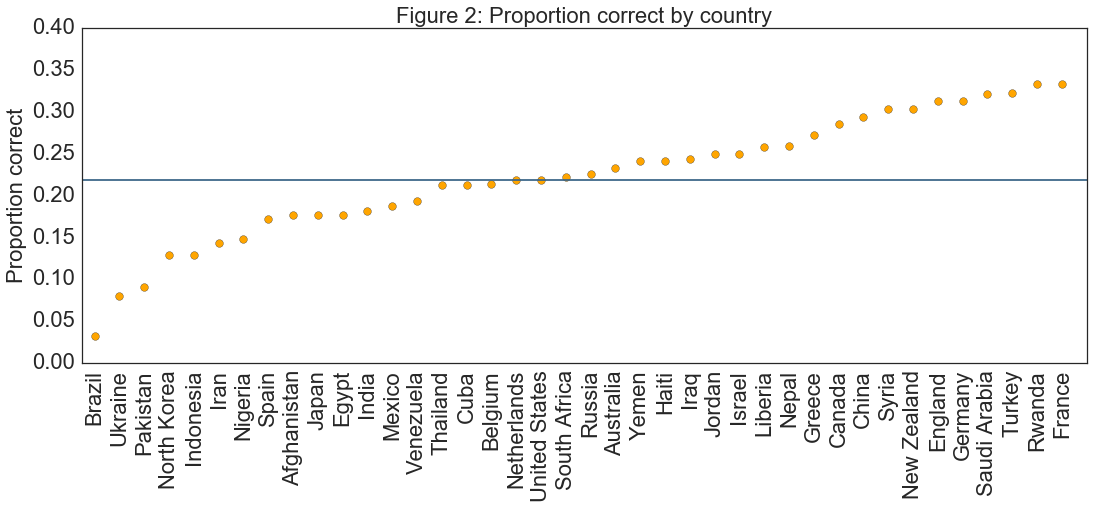

In [221]:
plt.figure(figsize=(18,6))

plt.title('Figure 2: Proportion correct by country',fontsize='22')

# US properties
us_prop=prop_correct_sort[prop_correct_sort.true_name=='United States']['prop_corr'].reset_index().loc[0]
plt.plot([-.5, len(prop_sorted)],[us_prop,us_prop], c='#396487')

# All countries
prop_sorted=prop_correct_sort.loc[:,'prop_corr']
countries_sorted=prop_correct_sort.loc[:,'true_name']
plt.scatter(range(len(prop_sorted)), prop_sorted,c='orange',s=60)

plt.ylabel('Proportion correct',fontsize='22')
plt.xticks(range(len(countries_sorted)), countries_sorted, rotation='90',fontsize=22)
plt.yticks(fontsize=22)
plt.axis([-.5, len(prop_correct), 0,.4])
plt.show()

## How many casualties did people expect?

Let's now instead look at what sort of mistakes subjects made

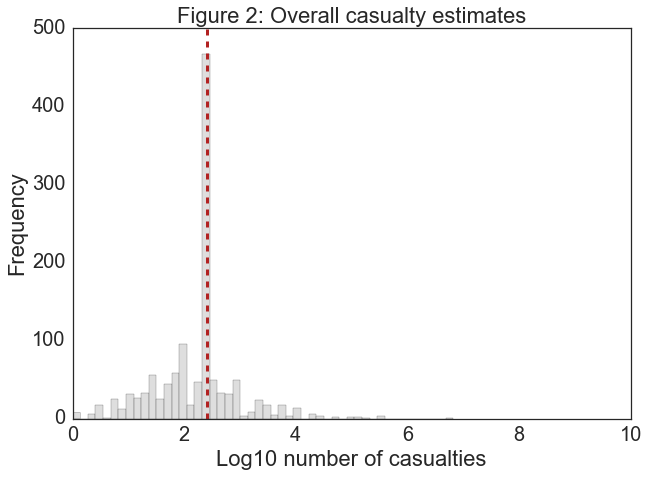

In [48]:
plt.figure(figsize=(10,7))

n, bins, patches = plt.hist(all_data['resp_casualties_log10'], 50, facecolor='lightgrey', alpha=0.75)

# add a 'best fit' line
l = plt.plot([correct_ans_log10,correct_ans_log10], [0,500], 'b--', linewidth=3,c='firebrick')

plt.title('Figure 2: Overall casualty estimates',fontsize='22')
plt.xlabel('Log10 number of casualties',fontsize='22')
plt.ylabel('Frequency',fontsize='22')
plt.tick_params(axis='both', labelsize=20)
plt.axis([0, 10, 0, 500])

plt.show()

Here is a histogram of how many casualties people reported. The dashed red line is the correct answer (hence why it's so frequent).

# Country-based biases in expectations

Now let's divide people's error trials by countries, so that we can see what kinds of biases people introduced

In [278]:
incorrect=all_data.loc[:,['true_name','resp_casualties','resp_casualties_log10']].query('resp_casualties!=261')
incorrect_country=incorrect.loc[:,['true_name','resp_casualties_log10']].groupby('true_name')
country_mean=incorrect_country.mean().rename(columns={'resp_casualties_log10':'mean'}).reset_index()
country_sd=incorrect_country.std().rename(columns={'resp_casualties_log10':'sd'}).reset_index()
country_count=incorrect_country.size().reset_index().rename(columns={0:'count'})
incorrect_country_stats=pd.merge(pd.merge(country_mean,country_sd,on='true_name'),country_count,on='true_name')
incorrect_country_stats.loc[:,'SEM']=incorrect_country_stats.loc[:,'sd']/np.sqrt(incorrect_country_stats.loc[:,'count'])

incorrect_country_stats=incorrect_country_stats.sort_values(by='mean').reset_index()
incorrect_country_stats.head()

,index,true_name,mean,sd,count,SEM
0,20,Liberia,1.507411,1.006008,23,0.209767
1,21,Mexico,1.753236,0.934524,26,0.183275
2,31,South Africa,1.864253,0.831672,21,0.181486
3,2,Belgium,1.871612,0.768781,22,0.163905
4,37,United States,1.903663,0.815434,25,0.163087


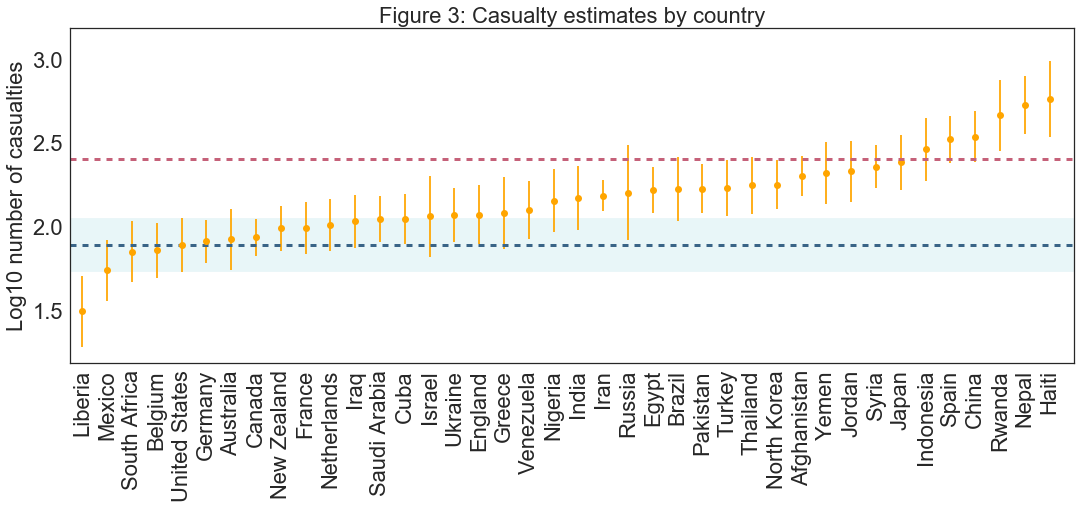

In [283]:
plt.figure(figsize=(18,6))

plt.title('Figure 3: Casualty estimates by country',fontsize='22')

# US properties
us_prop=incorrect_country_stats[incorrect_country_stats.true_name=='United States'].reset_index()

us_mean=us_prop['mean'].loc[0]
us_sem=us_prop.SEM.loc[0]
us_lo=us_mean-us_sem
us_hi=us_mean+us_sem
plt.fill_between([-.5, len(incorrect_country_stats)],[us_lo,us_lo], [us_hi,us_hi],\
                facecolor='#e1f3f6',edgecolor='white',alpha=.75)
plt.plot([-.5, len(incorrect_country_stats)],[us_mean,us_mean], 'b--', linewidth=3,c='#396487')

# All countries
country_log10_mean=incorrect_country_stats['mean']
country_log10_sem=incorrect_country_stats.SEM
countries_ordered=incorrect_country_stats.true_name

plt.errorbar(range(len(incorrect_country_stats)), y=country_log10_mean, yerr=country_log10_sem,c='orange',fmt='o')

# Correct
plt.plot([-.5, len(incorrect_country_stats)],[correct_ans_log10,correct_ans_log10], 'b--', linewidth=3,c='#c56179')


plt.ylabel('Log10 number of casualties',fontsize='22')

plt.xticks(range(len(incorrect_country_stats)), countries_ordered, rotation='90',fontsize=22)
plt.yticks(fontsize=22)
plt.axis([-.5, len(incorrect_country_stats), 1.2, 3.2])
plt.show()

Red dashed line is the correct answer, blue-patch is +/-1 SEM for the United States

Some interesting things to note and some speculation which is entirely post-hoc and should be not be treated seriously:
1. The United States and Mexico are very close. This may reflect the fact that we used "Texas" to represent the US (due to an earlier iteration in which we tried to match country/state sizes) and [Mechanical Turk users skewing liberal](http://themonkeycage.org/2012/12/how-representative-are-amazon-mechanical-turk-workers/) or Texas being right next to Mexico.
2. Liberia is really low. This is perplexing but may be due to Americans not knowing what Liberia is and assuming it is a small country. We quickly asked some people who walked by our lab what they knew about Liberia and the most common answer was "Nothing?"
3. Spain is really high. We're not sure what's going on with that
4. Iraq is low while Afghanistan is high. This may be because the US has more troops deployed in Iraq compared to Afghanistan, whereas the US involvement during the Afghanistan war was more limited.

# Interim summary

We are seeing some really fascinating patterns that capture people's expectations about tragedies in different countries. However, it's important to note that any conclusions will be correlational and that a different experiment will be necessary to make causal claims.

There are three next steps that we're planning on taking to really flesh our findings out:

1. Compare to real-world statistics on possible predictors (GDP, physical distance, tourism, article mentions, etc.)-We currently don't have a quantitative explanation for these results, just our general intuitions. People might be relying on some combination of these cues to reason about the articles
2. Examine how these biases change as they propogate through social networks-On Facebook and other social networks, people don't just read the posts; they also remember then, form their own impression of it and construct a new post. As that process repeats, the content of the original message will become distorted by the network's general expectations. Having people do this task in a similar social network (like the one used in Lew & Vul, 2015, Prior expectations in visual memory revealed by iterated learning) will allow us to examine these dynamics. Additionally, because the correct answer will change as it is passed from person to person, we will also being able to circumvent the problem of people remembering the correct answer 



# Name attention

Just an attention check--How well did people remember the names? Here, I'm going to use a weak measure: did they use a name that starts with "J"?

In [7]:
name_correct=[]

for tc in range(len(country_count)):
    # select country, leave out correct answers
    inds=np.logical_and(all_data['true_country']==str(tc),[ post_check(n) for n in all_data['resp_poster']])
    num_resp=all_data['true_country']==str(tc)
    name_correct.append(float(np.sum(inds))/np.sum(num_resp))


name_sort=np.argsort(name_correct)
name_correct_2=[name_correct[i] for i in name_sort]
countries2=[countries[i] for i in name_sort]

plt.figure(figsize=(18,6))

plt.title('Figure 4: Proportion name correct by country',fontsize='22')

# US properties
us_prop=name_correct[3]

plt.plot([-.5, len(country_correct)],[us_prop,us_prop],\
                c='#396487')

plt.scatter(range(len(country_sort)), name_correct_2,c='orange',s=60)
plt.ylabel('Proportion correct',fontsize='22')

plt.xticks(range(len(country_correct)), countries2, rotation='90',fontsize=22)
plt.yticks(fontsize=22)
plt.axis([-.5, len(country_correct), .1,.8])
plt.show()

NameError: name 'post_check' is not defined

# World Heatmap code

This generates colors for our heatmap

In [ ]:
c_hmap=sns.heatmap([country_log10_mean,country_log10_mean],cmap="YlGnBu")
country_colors_rgb01=c_hmap.get_children()[0].get_facecolors()[0:40]

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

country_colors_hex=[  rgb_to_hex(tuple([int(255*i2) for i2 in i[0:3]])) for i in country_colors_rgb01]
country_codes = ['NG','JP','PK','US','FR','RU',\
                'ID','MX','RW','HT','JO','CU','LR','KP','SY','IQ','YE','UA','AF','TR',\
                'VE','EG','IR','SA','CN','IL','GR','NP','GB','NZ','DE','ES','TH','ZA',\
                'IN','AU','BR','CA','BE','NL']
print [round(i,2) for i in country_log10_mean]
print [round(i,2) for i in country_log10_sem]
print [i.lower() for i in country_codes]
print country_colors_hex

In [ ]:
NA=101 # drew sent me a csv with NA. this seemed easier than adding quotes
favor=[NA,82,21,NA,\
87,30,NA,59,\
NA,NA,57,54,\
NA,8,12,15,\
NA,52,15,NA,\
NA,53,14,37,\
44,71,NA,NA,\
90,NA,85,NA,\
NA,NA,75,NA,\
73,93,NA,NA]
c_hmap=sns.heatmap([favor,favor],cmap="YlGnBu_r")
country_colors_rgb01=c_hmap.get_children()[0].get_facecolors()[0:40]
country_colors_hex=[  rgb_to_hex(tuple([int(255*i2) for i2 in i[0:3]])) for i in country_colors_rgb01]

print favor
print [i.lower() for i in country_codes]
def replace_nan(x):
    if x[1]=='#ffffd9': 
        return '#ffffff' 
    else: 
        return x[1]
    
print [ replace_nan([i,cch]) for i,cch in enumerate(country_colors_hex)]
